In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import bmf # <- the custom codes

# Loading a test image

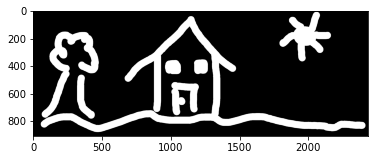

In [2]:
test_image = plt.imread('testimage.jpg')

def rgb2gray(rbg_image):
    ''' rgb to grey by averaging over the channel dimension '''
    return rbg_image.mean(-1)

test_image = torch.from_numpy(rgb2gray(test_image))
test_image = (test_image > 255/2).float()

plt.imshow(test_image, cmap='Greys');

# Perform binary matrix factorisation

In [3]:
torch.manual_seed(1)
p, q, obj_func_values = bmf.binary_matrix_factorisation(
    test_image, 
    rank=50, # <- rank of p and q, this influences the compression factor
    step_size=1e-1, 
    iterations=1000
)

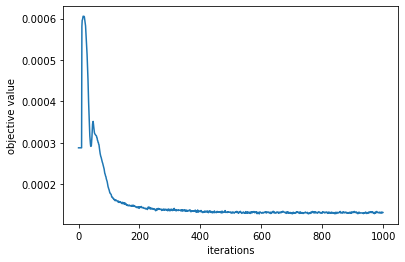

In [4]:
plt.plot(obj_func_values)
plt.xlabel('iterations')
plt.ylabel('objective value');

In [5]:
reconstruction = bmf.to_binary(p@q.T) # <- reconstruction matrix 

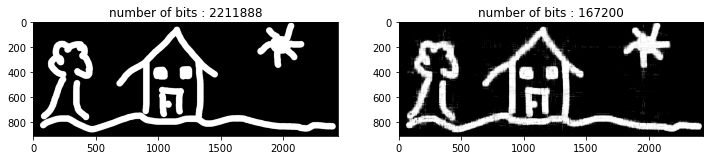

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

original_image_size = test_image.shape[0] * test_image.shape[1]
reconstruction_image_size = q.shape[0] * q.shape[1] + p.shape[0] * p.shape[1]

ax[0].imshow(test_image, cmap='Greys')
ax[0].set_title(f'number of bits : {original_image_size}')
ax[1].imshow(reconstruction, cmap='Greys');
ax[1].set_title(f'number of bits : {reconstruction_image_size}');